Step 0:
----------

Set up your analysis

In [1]:
import gt_apps
import pyfits
from gt_apps import *

Step 1:
----------

Generate a counts map (data).

* Filter your data (filter)
* Correct your gtis (mktime)
* Bin your data (counts_map)

In [42]:
filter['infile'] = '@/home/fermiuser/shared/Likelihood_data/events.txt'
filter['outfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_filtered.fits'
filter['ra'] = 194.046527
filter['dec'] = -5.789312
filter['rad'] = 30
filter['tmin'] = 239557417
filter['tmax'] = 255398400
filter['emin'] = 100
filter['emax'] = 100000
filter['zmax'] = 100
filter['evclass'] = 2

In [ ]:
filter.run()

In [43]:
maketime['evfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_filtered.fits'
maketime['outfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits'
maketime['scfile'] = '/home/fermiuser/shared/Likelihood_data/L1405221252264C652E7F67_SC00.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'yes'

In [ ]:
maketime.run()

In [48]:
counts_map['evfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_cmap.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 194.046527
counts_map['yref'] = -5.789312
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 400
counts_map['nypix'] = 400
counts_map['binsz'] = 0.1
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'

In [47]:
counts_map.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbin evfile=/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits scfile=NONE outfile=/home/fermiuser/shared/Likelihood_data/3C279_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=400 nypix=400 binsz=0.1 coordsys="CEL" xref=194.046527 yref=-5.789312 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version ScienceTools-v9r33p0-fssc-20140520
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 1.15
user 0.05
sys 0.76


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


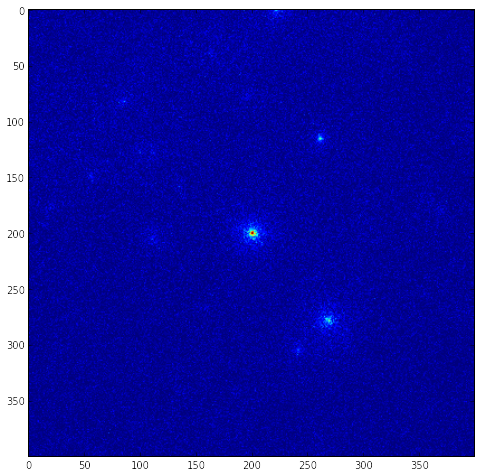

In [6]:
cmap = pyfits.open('/home/fermiuser/shared/Likelihood_data/3C279_cmap.fits')
figsize(16,8)
imshow(cmap[0].data)

Step 2:
---------

Generate a model map inputs. 

* You need many inputs:
    * 1) Binned counts cube (evtbin)
    * 2) Livetime cube (expCube)
    * 3) Binned exposure cube (gtexpcube2) - make sure energy binning matches \#1
    * 4) Input XML model

In [24]:
evtbin.pars()

' evfile= scfile=NONE outfile= algorithm="PHA2" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [63]:
evtbin['evfile']= '/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits'
evtbin['scfile']='NONE' 
evtbin['outfile']= '/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits'
evtbin['algorithm']="CCUBE" 
evtbin['ebinalg']="LOG" 
evtbin['emin']=100.0 
evtbin['emax']=100000.0 
evtbin['coordsys']="CEL" 
evtbin['proj']="AIT"
evtbin['nxpix'] = 400
evtbin['nypix'] = 400
evtbin['binsz'] = 0.1
evtbin['xref'] = 194.046527
evtbin['yref'] = -5.789312
evtbin['ebinalg'] = 'LOG'
evtbin['enumbins'] = 20

In [64]:
evtbin.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtbin evfile=/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits scfile=NONE outfile=/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits algorithm="CCUBE" ebinalg="LOG" emin=100.0 emax=100000.0 enumbins=20 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=400 nypix=400 binsz=0.1 coordsys="CEL" xref=194.046527 yref=-5.789312 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version ScienceTools-v9r33p0-fssc-20140520
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 4.30
user 0.11
sys 2.00


In [53]:
expCube.pars()

' evfile="/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits" evtable="EVENTS" scfile=/home/fermiuser/shared/Likelihood_data/L1405221252264C652E7F67_SC00.fits sctable="SC_DATA" outfile=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=180.0 chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [32]:
expCube['evfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_mktime.fits'
expCube['scfile'] = '/home/fermiuser/shared/Likelihood_data/L1405221252264C652E7F67_SC00.fits'
expCube['outfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits'
expCube['dcostheta'] = 0.025
expCube['binsz'] = 1.0

In [ ]:
expCube.run()

In [ ]:
from GtApp import GtApp
expCube2 = GtApp('gtexpcube2','Likelihood')

In [54]:
expCube2.pars()

' infile= cmap= outfile= irfs="CALDB" nxpix=360 nypix=180 binsz=1.0 coordsys="GAL" xref=0.0 yref=0.0 axisrot=0.0 proj="CAR" ebinalg="LOG" emin=100.0 emax=300000.0 enumbins=10 ebinfile="NONE" bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=2 clobber=yes debug=no mode="ql"'

In [66]:
expCube2['infile'] = "/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits"
expCube2['cmap'] = '/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits'
expCube2['outfile'] = "/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits"
expCube2['irfs'] = "P7REP_SOURCE_V15"
expCube2['xref'] = 194.046527
expCube2['yref'] = -5.789312
expCube2['nxpix'] = 800
expCube2['nypix'] = 800
expCube2['binsz'] = 0.1
expCube2['coordsys'] = "CEL"
expCube2['axisrot'] = 0
expCube2['proj'] = 'AIT'
expCube2['ebinalg'] = "LOG"
expCube2['emin'] = 100.0
expCube2['emax'] = 100000.0
expCube2['enumbins'] = 20

In [67]:
expCube2.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtexpcube2 infile=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits cmap=/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits outfile=/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits irfs="P7REP_SOURCE_V15" nxpix=800 nypix=800 binsz=0.1 coordsys="CEL" xref=194.046527 yref=-5.789312 axisrot=0.0 proj="AIT" ebinalg="LOG" emin=100.0 emax=100000.0 enumbins=20 ebinfile="NONE" bincalc="EDGE" ignorephi=no thmax=180.0 thmin=0.0 table="EXPOSURE" chatter=2 clobber=yes debug=no mode="ql"
Computing binned exposure map....................!
real 22.90
user 16.16
sys 3.76


Step 3:
---------

Generate a model map for your current XML model (model). 

In [57]:
model_map.pars()

' srcmaps=/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits srcmdl=/home/fermiuser/shared/Likelihood_data/3C279_input_model.xml outfile=/home/fermiuser/shared/Likelihood_data/3C279_model1.fits irfs="P7REP_SOURCE_V15" expcube=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits bexpmap=/home/fermiuser/shared/Likelihood_data/3C279_expmap.fits convol=yes resample=yes rfactor=2 outtype="CMAP" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [68]:
model_map['srcmaps']='/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits'
model_map['srcmdl']='/home/fermiuser/shared/Likelihood_data/3C279_input_model.xml'
model_map['outfile']='/home/fermiuser/shared/Likelihood_data/3C279_model1.fits'
model_map['irfs']='P7REP_SOURCE_V15'
model_map['expcube']='/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits'
model_map['bexpmap']='/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits'

In [69]:
model_map.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtmodel srcmaps=/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits srcmdl=/home/fermiuser/shared/Likelihood_data/3C279_input_model.xml outfile=/home/fermiuser/shared/Likelihood_data/3C279_model1.fits irfs="P7REP_SOURCE_V15" expcube=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits bexpmap=/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits convol=yes resample=yes rfactor=2 outtype="CMAP" chatter=2 clobber=yes debug=no gui=no mode="ql"
Generating SourceMap for 3C 273....................!
Generating SourceMap for 3C 279....................!
Generating SourceMap for gll_iem_v05_rev1....................!
Generating SourceMap for iso_source_v05....................!
real 810.04
user 785.99
sys 8.84


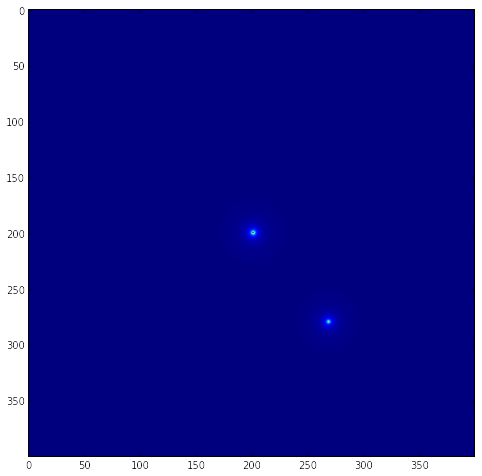

In [7]:
model1 = pyfits.open('/home/fermiuser/shared/Likelihood_data/3C279_model1.fits')
imshow(model1[0].data)

Step 4:
---------

Generate a residual map by calculating (data-model)/model. 

One suite of tools for manipulating images are the [futils](http://heasarc.gsfc.nasa.gov/lheasoft/ftools/fimage.html) in the [FTOOLS](http://heasarc.gsfc.nasa.gov/docs/software/ftools/ftools_menu.html) software package from the HEASARC.

Here we will use the **farith** tool to first subtract (SUB), and then divide (DIV) two images.

In [72]:
%system farith /home/fermiuser/shared/Likelihood_data/3C279_cmap.fits /home/fermiuser/shared/Likelihood_data/3C279_model1.fits /home/fermiuser/shared/Likelihood_data/3C279_diff_map.fits SUB

[]

In [73]:
%system farith /home/fermiuser/shared/Likelihood_data/3C279_diff_map.fits /home/fermiuser/shared/Likelihood_data/3C279_model1.fits /home/fermiuser/shared/Likelihood_data/3C279_resid_map.fits DIV 

[]

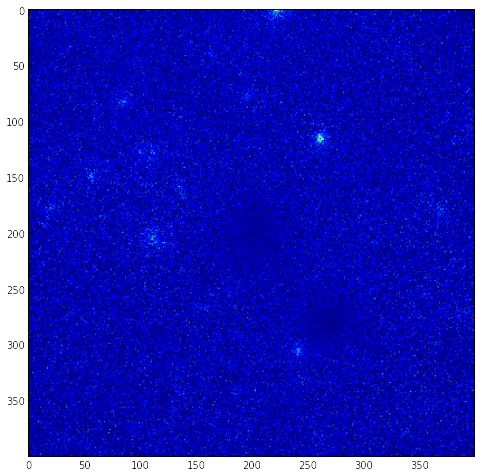

In [8]:
resid = pyfits.open('/home/fermiuser/shared/Likelihood_data/3C279_resid_map.fits')
imshow(resid[0].data)

Step 5:
--------

Locate unmodeled point sources and add them to your model.

* Open file with [ds9](http://hea-www.harvard.edu/RD/ds9/site/Home.html) - Download and install this in /home/fermiuser/AstroSoft/bin
* Rescale (sqrt) and smooth
* Mouse over bright point sources to find locations - WCS menu to change to degrees

In [75]:
%system ds9 /home/fermiuser/shared/Likelihood_data/3C279_resid_map.fits

^C


[]

I see additional significant sources at:

* 187.82, -14.21
* 190.00, 4.69
* 203.04, -5.27
* 191.70, -25.73

The other sources are not clearly significant enough to consider without having performed a likelihood fit. This should be enough to get started.

Step 6:
--------

Add new sources to your model and perform a fit before searching for more sources to include. We can use products we've already generated. You can use:

* Same data file (if diffuse responses are calculated)
* Same livetime cube
* Same binned exposure cube

Need to run:

* Source maps (srcMaps)
* Binned likelihood fit (BinnedAnalysis)

In [80]:
%srcMaps['scfile'] = 'L1405221252264C652E7F67_SC00.fits'
srcMaps['expcube'] = '/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits'
srcMaps['cmap'] = '/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits'
srcMaps['srcmdl'] = '/home/fermiuser/shared/Likelihood_data/3C279_input_model2.xml'
srcMaps['bexpmap'] = '/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits'
srcMaps['outfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_srcMaps.fits'
srcMaps['irfs'] = "P7REP_SOURCE_V15"
srcMaps['rfactor'] = 4
srcMaps['emapbnds'] = "no"

In [81]:
srcMaps.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtsrcmaps scfile=L1405221252264C652E7F67_SC00.fits sctable="SC_DATA" expcube=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits cmap=/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits srcmdl=/home/fermiuser/shared/Likelihood_data/3C279_input_model2.xml bexpmap=/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits outfile=/home/fermiuser/shared/Likelihood_data/3C279_srcMaps.fits irfs="P7REP_SOURCE_V15" convol=yes resample=yes rfactor=4 minbinsz=0.1 ptsrc=yes psfcorr=yes emapbnds=no copyall=no chatter=2 clobber=yes debug=no gui=no mode="ql"
Generating SourceMap for 3C 273....................!
Generating SourceMap for 3C 279....................!
Generating SourceMap for NewSource1....................!
Generating SourceMap for NewSource2....................!
Generating SourceMap for NewSource3....................!
Generating SourceMap for NewSource4....................!
Generating Sourc

In [9]:
from BinnedAnalysis import *
obs = BinnedObs(srcMaps='/home/fermiuser/shared/Likelihood_data/3C279_srcMaps.fits',
                expCube='/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits',
                binnedExpMap='/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits',
                irfs='P7REP_SOURCE_V15')

In [10]:
analysis = BinnedAnalysis(obs,'/home/fermiuser/shared/Likelihood_data/3C279_input_model2.xml',optimizer='MINUIT')

In [11]:
likeObj = pyLike.NewMinuit(analysis.logLike)
analysis.fit(covar=True,optObject=likeObj)

475864.5473114895

In [12]:
likeObj.getRetCode()

0

In [13]:
analysis.model

3C 273
   Spectrum: PowerLaw
0      Prefactor:  1.007e+01  3.532e-01  1.000e-03  1.000e+03 ( 1.000e-09)
1          Index: -2.650e+00  2.559e-02 -5.000e+00 -1.000e+00 ( 1.000e+00)
2          Scale:  1.000e+02  0.000e+00  3.000e+01  2.000e+03 ( 1.000e+00) fixed

3C 279
   Spectrum: PowerLaw
3      Prefactor:  8.665e+00  2.572e-01  1.000e-03  1.000e+03 ( 1.000e-09)
4          Index: -2.248e+00  1.668e-02 -5.000e+00 -1.000e+00 ( 1.000e+00)
5          Scale:  1.000e+02  0.000e+00  3.000e+01  2.000e+03 ( 1.000e+00) fixed

NewSource1
   Spectrum: PowerLaw
6      Prefactor:  1.100e+00  9.852e-02  1.000e-03  1.000e+03 ( 1.000e-09)
7          Index: -1.901e+00  3.416e-02 -5.000e+00 -1.000e+00 ( 1.000e+00)
8          Scale:  1.000e+02  0.000e+00  3.000e+01  2.000e+03 ( 1.000e+00) fixed

NewSource2
   Spectrum: PowerLaw
9      Prefactor:  1.177e+00  1.575e-01  1.000e-03  1.000e+03 ( 1.000e-09)
10         Index: -2.259e+00  6.092e-02 -5.000e+00 -1.000e+00 ( 1.000e+00)
11         Scale:  1.000e+02  

In [14]:
tsvalues=[[s,analysis.Ts(s)] for s in analysis.sourceNames()]

In [15]:
for t in tsvalues:
    print t[0],t[1]

3C 273 5202.4808591
3C 279 10529.1819318
NewSource1 1617.53353033
NewSource2 506.933095976
NewSource3 511.561938521
NewSource4 889.080106459
gll_iem_v05_rev1 18547.0446166
iso_source_v05 9581.87965478


In [16]:
analysis.writeXml('/home/fermiuser/shared/Likelihood_data/3C279_fit1_model.xml')

Step 7:
---------

Generate a model map for your new, fitted XML model. Then create a new residual map.

Now that we're manipulating the source models in the XML model, it's best to calculate source maps **only** for the diffuse models. Ppoint source maps are very easy and quick to calculate, and will be calculated on the fly by **gtmodel**. This way we can manipulate all the sources we want without having to re-run the source maps step.

In [74]:
srcMaps['scfile'] = 'L1405221252264C652E7F67_SC00.fits'
srcMaps['expcube'] = '/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits'
srcMaps['cmap'] = '/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits'
srcMaps['srcmdl'] = '/home/fermiuser/shared/Likelihood_data/3C279_diffonly_model.xml'
srcMaps['bexpmap'] = '/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits'
srcMaps['outfile'] = '/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits'
srcMaps['irfs'] = "P7REP_SOURCE_V15"
srcMaps['rfactor'] = 4
srcMaps['emapbnds'] = "no"

In [75]:
srcMaps.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtsrcmaps scfile=L1405221252264C652E7F67_SC00.fits sctable="SC_DATA" expcube=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits cmap=/home/fermiuser/shared/Likelihood_data/3C279_ccube.fits srcmdl=/home/fermiuser/shared/Likelihood_data/3C279_diffonly_model.xml bexpmap=/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits outfile=/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits irfs="P7REP_SOURCE_V15" convol=yes resample=yes rfactor=4 minbinsz=0.1 ptsrc=yes psfcorr=yes emapbnds=no copyall=no chatter=2 clobber=yes debug=no gui=no mode="ql"
Generating SourceMap for gll_iem_v05_rev1....................!
Generating SourceMap for iso_source_v05....................!
real 3635.16
user 2159.27
sys 23.98


In [17]:
model_map['srcmaps']='/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits'
model_map['srcmdl']='/home/fermiuser/shared/Likelihood_data/3C279_fit1_model.xml'
model_map['outfile']='/home/fermiuser/shared/Likelihood_data/3C279_model2.fits'
model_map['irfs']='P7REP_SOURCE_V15'
model_map['expcube']='/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits'
model_map['bexpmap']='/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits'

In [18]:
model_map.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtmodel srcmaps=/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits srcmdl=/home/fermiuser/shared/Likelihood_data/3C279_fit1_model.xml outfile=/home/fermiuser/shared/Likelihood_data/3C279_model2.fits irfs="P7REP_SOURCE_V15" expcube=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits bexpmap=/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits convol=yes resample=yes rfactor=2 outtype="CMAP" chatter=2 clobber=yes debug=no gui=no mode="ql"
Generating SourceMap for 3C 273....................!
Generating SourceMap for 3C 279....................!
Generating SourceMap for NewSource1....................!
Generating SourceMap for NewSource2....................!
Generating SourceMap for NewSource3....................!
Generating SourceMap for NewSource4....................!
real 53.69
user 15.04
sys 15.47


In [21]:
%system farith /home/fermiuser/shared/Likelihood_data/3C279_cmap.fits /home/fermiuser/shared/Likelihood_data/3C279_model2.fits /home/fermiuser/shared/Likelihood_data/3C279_diff_map2.fits SUB
%system farith /home/fermiuser/shared/Likelihood_data/3C279_diff_map2.fits /home/fermiuser/shared/Likelihood_data/3C279_model2.fits /home/fermiuser/shared/Likelihood_data/3C279_resid_map2.fits DIV

[]

Populating the interactive namespace from numpy and matplotlib


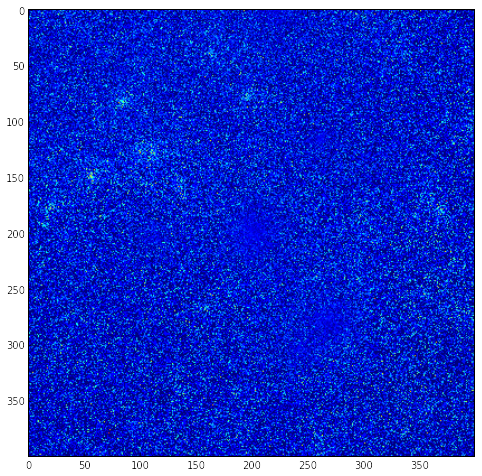

In [22]:
%pylab inline
figsize(16,8)
resid2 = pyfits.open('/home/fermiuser/shared/Likelihood_data/3C279_resid_map2.fits')
imshow(resid2[0].data)

This is looking much flatter! Once again, it's better to use ds9 and smooth to look at the residuals.

In [30]:
%system ds9 /home/fermiuser/shared/Likelihood_data/3C279_resid_map2.fits

[]

Hmm....there are still some pointlike sources in the field, plus it appears that several of the sources are oversubtracted.

To handle the additional sources, just iterate.

**When do I stop adding sources?**

* When you find that you are adding sources that are not significant after your fit

It's also useful to make residual maps in sigma units so you know *a priori* whether a source is likely to be significant. Here we make a significance map using (model-data)/sqrt(model).

In [31]:
%system ftcopy '/home/fermiuser/shared/Likelihood_data/3C279_model2.fits[pix sqrt(x)]' /home/fermiuser/shared/Likelihood_data/3C279_model2_sqrt.fits
%system farith /home/fermiuser/shared/Likelihood_data/3C279_diff_map2.fits /home/fermiuser/shared/Likelihood_data/3C279_model2_sqrt.fits /home/fermiuser/shared/Likelihood_data/3C279_resid_map2_sigma.fits DIV

[]

In [32]:
%system ds9 /home/fermiuser/shared/Likelihood_data/3C279_resid_map2_sigma.fits

[]

As you can see, the remaining excesses are all less than 3 sigma. 

Actually, this is an approximation. To be formally correct, we should use the data image to calculate sigma, rather than the model map. However, we have to mask off the zero count bins. Otherwise, they will give us a divide-by-zero error when we calculate the significance map.

Here's how you can make a significance map using (model-data)/sqrt(data).

In [33]:
%system ftcopy '/home/fermiuser/shared/Likelihood_data/3C279_cmap.fits[pix x<3?0.5+sqrt(x+0.25):sqrt(x)]' /home/fermiuser/shared/Likelihood_data/3C279_sigmadata.fits
%system farith /home/fermiuser/shared/Likelihood_data/3C279_diff_map2.fits /home/fermiuser/shared/Likelihood_data/3C279_sigmadata.fits /home/fermiuser/shared/Likelihood_data/3C279_resid_map2_sigmadata.fits DIV

[]

In [60]:
%system ds9 /home/fermiuser/shared/Likelihood_data/3C279_resid_map2_sigmadata.fits

[]

There are a few more "sources" in there that don't appear to be very significant, but that are clearly keeping us from having flat residuals.

Step 8:
--------
How can we decide if these sources should actually be in our model? We have to test their significance using Likelihood.

* Make a test model and add your questionable sources to it.
* Rerun your likelihood fit using this test model (don't bother re-running source maps)
* Look at the TS of the new sources to see if they are significant

In [35]:
%system cp /home/fermiuser/shared/Likelihood_data/3C279_fit1_model.xml /home/fermiuser/shared/Likelihood_data/3C279_test_model.xml

[]

In [23]:
obs2 = BinnedObs(srcMaps='/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits',
                expCube='/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits',
                binnedExpMap='/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits',
                irfs='P7REP_SOURCE_V15')

In [24]:
analysis2 = BinnedAnalysis(obs2,'/home/fermiuser/shared/Likelihood_data/3C279_test_model.xml',optimizer='MINUIT')

In [25]:
likeObj2 = pyLike.NewMinuit(analysis2.logLike)
analysis2.fit(covar=True,optObject=likeObj2)

475397.35989828454

In [26]:
likeObj2.getRetCode()

0

And we do have convergence. 

Let's look at the TS values to see how significant the new sources are....

In [27]:
tsvalues2=[[s,analysis2.Ts(s)] for s in analysis2.sourceNames()]
for t in tsvalues2:
    print t[0],t[1]

3C 273 5314.44050595
3C 279 10690.4623288
NewSource1 1658.80223463
NewSource2 525.032874655
NewSource3 498.373612006
NewSource4 924.7995114
TestSource1 317.604460094
TestSource2 260.636027711
TestSource3 314.611105411
gll_iem_v05_rev1 17815.2949277
iso_source_v05 9624.15727098


The TS values seem to show these are real sources. However, the real question we are asking is whether including these two additional sources actually improved our model of the gamma-ray emission.

To determine this, we should look at the change in the logLikelihood value.

In [28]:
print [analysis()-analysis2()]

[467.1874132049852]


As you can see, all three new sources are significantly detected when using a power-law model. 

For each source we added as a Power Law, the number of free parameters increased by 2. The delta[logLikelohood] is 467, with 6 additional free parameters. To calculate the effective improvement, you need to understand how the chi-quared distribution behaves with 6 degrees of freedom.

Here's a handy [chi-squared table](http://sites.stat.psu.edu/~mga/401/tables/Chi-square-table.pdf).

As you can see, for 6 degrees of freedom, the logLikelihood value must change by 12.592 to give a 95% confidence (p-value of .050) that the improvement is real.

So we should write out this model for future use.

In [69]:
analysis2.writeXml('/home/fermiuser/shared/Likelihood_data/3C279_fit2_model.xml')

Step 9:
-------

Now we just iterate...

* Generate a new model map, and then a new significance map
* Add more point sources
* Fit and look at source significance


But wait!
--------

What about those negative residuals?

Negative residuals typically have two possible causes:

* The spectral model you are using is not appropriate for the source
* Your source position is not correct

How do we resolve these?

Spectral Model Changes
----------

It's best to change your spectral model as little as possible, slowly adapting it to the shape that best represents the data. Every additional free parameter will affect the significance of your detection. Don't change your spectral shape more than the data can support.

If you know the source class, you can consider using the spectral model that is typically used for those sources. For example:

* Pulsars typically use PLExpCutoff
* Blazars use LogParabola in the catalog. Others may use BrokenPowerLaw
* Globular clusters and gamma-ray binaries often use LogParabola

Here we will change the spectral form for 3C279 to LogParabola and then re-run the fit. If we fix the value for alpha to 1, then the number of additional free parameters is only 1.

You can find an example XML model for the LogParabola form at [this link](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/xml_model_defs.html#logParabola).

In [36]:
%system cp /home/fermiuser/shared/Likelihood_data/3C279_fit2_model.xml /home/fermiuser/shared/Likelihood_data/3C279_spectral_test1_model.xml

[]

In [37]:
obs3 = BinnedObs(srcMaps='/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits',
                expCube='/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits',
                binnedExpMap='/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits',
                irfs='P7REP_SOURCE_V15')

In [38]:
analysis3 = BinnedAnalysis(obs3,'/home/fermiuser/shared/Likelihood_data/3C279_spectral_test1_model.xml',optimizer='MINUIT')

In [39]:
likeObj3 = pyLike.NewMinuit(analysis3.logLike)
analysis3.fit(covar=True,optObject=likeObj3)

475419.32094773883

In [40]:
likeObj3.getRetCode()

0

In [41]:
tsvalues3=[[s,analysis3.Ts(s)] for s in analysis3.sourceNames()]
for t in tsvalues3:
    print t[0],t[1]

3C 273 5315.38980487
3C 279 10636.7640025
NewSource1 1663.40752734
NewSource2 523.0735329
NewSource3 504.976156326
NewSource4 925.58177399
TestSource1 318.560664966
TestSource2 258.839489139
TestSource3 316.132857538
gll_iem_v05_rev1 17281.0833684
iso_source_v05 9965.70536994


In [42]:
print [analysis2()-analysis3()]

[-21.961049454286695]


So we can see that the fit converged, all the sources are significant, and that changing 3C279 to LogParabola (adding 1 degree of freedom) has changed the logLikelihood value by -21.96. A negative delta(logLikelihood) means that the change to the spectra resulted in a **worse** fit.

This means that the previous version of the XML model is a better descriptor of the data.

Step 10:
-------

Are we at the end?

Well, you don't want to kill yourself with trials. So there may be ways to improve your model without too many additional tests.

If you believe these sources are real, you can add them, but fix them to their catalog values.

**NOTE:** For sources that are variable in the catalog, you may want to leave their normalizations free.

In [59]:
%system fv /home/fermiuser/shared/3FGL/gll_psc_v16.fit

[]

In [43]:
model_map['srcmaps']='/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits'
model_map['srcmdl']='/home/fermiuser/shared/Likelihood_data/3C279_fit2_model.xml'
model_map['outfile']='/home/fermiuser/shared/Likelihood_data/3C279_fit2_modelmap.fits'
model_map['irfs']='P7REP_SOURCE_V15'
model_map['expcube']='/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits'
model_map['bexpmap']='/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits'

In [44]:
model_map.run()

time -p /home/fermiuser/AstroSoft/ScienceTools/x86_64-unknown-linux-gnu-libc2.12/bin/gtmodel srcmaps=/home/fermiuser/shared/Likelihood_data/3C279_diffonly_srcMaps.fits srcmdl=/home/fermiuser/shared/Likelihood_data/3C279_fit2_model.xml outfile=/home/fermiuser/shared/Likelihood_data/3C279_fit2_modelmap.fits irfs="P7REP_SOURCE_V15" expcube=/home/fermiuser/shared/Likelihood_data/3C279_ltcube.fits bexpmap=/home/fermiuser/shared/Likelihood_data/3C279_BinnedExpMap.fits convol=yes resample=yes rfactor=2 outtype="CMAP" chatter=2 clobber=yes debug=no gui=no mode="ql"
Generating SourceMap for 3C 273....................!
Generating SourceMap for 3C 279....................!
Generating SourceMap for NewSource1....................!
Generating SourceMap for NewSource2....................!
Generating SourceMap for NewSource3....................!
Generating SourceMap for NewSource4....................!
Generating SourceMap for TestSource1....................!
Generating SourceMap for TestSource2........

In [46]:
%system farith /home/fermiuser/shared/Likelihood_data/3C279_cmap.fits /home/fermiuser/shared/Likelihood_data/3C279_fit2_modelmap.fits /home/fermiuser/shared/Likelihood_data/3C279_fit2_diffmap.fits SUB
%system farith /home/fermiuser/shared/Likelihood_data/3C279_fit2_diffmap.fits /home/fermiuser/shared/Likelihood_data/3C279_sigmadata.fits /home/fermiuser/shared/Likelihood_data/3C279_fit2_residmap_sigmadata.fits DIV

[]

In [47]:
%system ds9 /home/fermiuser/shared/Likelihood_data/3C279_fit2_residmap_sigmadata.fits

[]